A问了Q1，A、B、C、E回答了Q1,C回答被接受


所以'Q1'>'A','C'>'Q1','C'>'A','C'>'B','C'>'E'


以此类推


Question：Q1,Q2,Q3,Q4 = -1,-2,-3,-4


User：A,B,C,D,E = 1,2,3,4,5

In [1]:
%load_ext autoreload
%autoreload 2
from trueskill import *

In [2]:
#winner,loser
#需要为问题注明Q
toy_data0 = [('Q1','A'),('B','Q1'),('B','A'),]


In [3]:
EE = get_trueskill(toy_data0,iter_time=2,record = False)
#iter_time 迭代次数
#record 是否记录中间过程
EE

==Time 0.00==
==Time 0.00==
==Time 0.00==


[{'Q1': 20.425632762043424}, {'A': 9.325615686258269, 'B': 23.36004860708529}]

In [4]:
iter_time = 20
EE = get_trueskill(toy_data0,iter_time=iter_time ,record = True)
#iter_time 迭代次数
#record 是否记录中间过程

==Time 0.00==
==Time 0.00==
==Time 0.00==


In [5]:
x=[]
for i in range(0,iter_time+1):
    x.append([EE[i][1]['A'], EE[i][0]['Q1'],EE[i][1]['B']])

In [6]:
import numpy as np
x = np.array(x)
b = np.ones((iter_time+1,3))
for i in range(iter_time+1):
    b[i,:] = b[i,:]*x[i,1]
x = x - b

In [9]:
import matplotlib.pyplot as plt
y = [i  for i in range(iter_time+1)]
x1 = [x[i,0] for i in range(iter_time+1)]

Text(0, 0.5, 'iter_time')

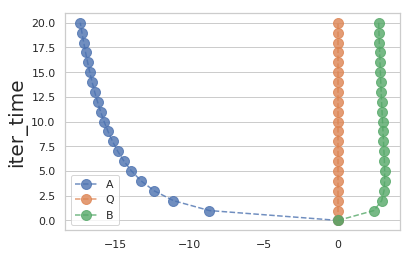

In [10]:
import seaborn as sns
sns.set(style="whitegrid",  color_codes=True)
f,ax = plt.subplots()
name = ['A','Q','B']
for j in range(3):
    y = [i  for i in range(iter_time+1)]
    x1 = [x[i,j] for i in range(iter_time+1)]
    plt.plot(x1,y,'o--',ms=10,alpha=0.8,label = name[j])
plt.legend()
ax.yaxis.grid(True)
ax.xaxis.grid(False)
#plt.yticks(range(iter_time+1))
ax.set_ylabel('iter_time',fontsize=20)